# Notebook for trying to recreate the delta->omikron wave of fall/winter 2021

In [3]:
%matplotlib widget

import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf
import PandemiXModelFunctions as pmf

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
             
             
from scipy.integrate import cumtrapz
# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 

In [4]:
# Reload PandemiXModelFunctions, in case changes have been made
import importlib 
importlib.reload(pmf)

<module 'PandemiXModelFunctions' from 'c:\\Users\\rakrpe\\GithubRepos\\PandemiX\\modelling\\PandemiXModelFunctions.py'>

In [5]:
path_figs = os.getcwd() + '\\Figures\\'
path_figs = path_figs + 'TwoStrainModel_'

# Start by just getting the delta growth correct

In [6]:
# Initialize everything
iniInf = 0.000005
iniVacc = 0.8 # Approximately DK's vaccinationsrate at the end of summer 2021
iniImmu = 0.05 # Approximation. Should only be "natural immunity"
iniImmu = iniImmu * (1-iniVacc) # For splitting previous infections between vaccinated and susceptible

V_0 = iniVacc 
IS_0 = 0
IV_0 = 0
Y_0 = iniInf
R01_0 = iniImmu
R10_0 = 0
I01_0 = 0
Y10_0 = 0
S_0 = 1 - V_0 - IS_0 - IV_0 - Y_0 - R01_0 - R10_0 - I01_0 - Y10_0 

init = {    
    'S' : S_0,
    'V' : V_0,
    'IS' : IS_0,
    'IV' : IV_0,
    'Y' : Y_0,
    'R01' : R01_0,
    'R10' : R10_0,
    'I01' : I01_0,
    'Y10' : Y10_0,
}

gammas = 1/7
beta_Y = 6*gammas # For zero initial immunity
beta_Y = 6.5*gammas
beta_I = 2*gammas

pars = {
    'beta_IS_S' : beta_I,
    'beta_IV_S' : beta_I,
    'beta_I01_S' : beta_I,
    'beta_IS_V' : beta_I,
    'beta_IV_V' : beta_I,
    'beta_I01_V' : beta_I,
    'beta_IS_R01' : beta_I,
    'beta_IV_R01' : beta_I,
    'beta_I01_R01' : beta_I,
    'beta_Y_S' : beta_Y,
    'beta_Y10_S' : beta_Y,
    'beta_Y_R10' : beta_Y,
    'beta_Y10_R10' : beta_Y,
    'gamma_IS' : gammas,
    'gamma_IV' : gammas,
    'gamma_Y' : gammas,
    'gamma_I01' : gammas,
    'gamma_Y10' : gammas,
    }


In [7]:
tEnd = 500
sch1 = pmf.Scheme('OmikronDeltaFull',init,pars,0,tEnd,Changes=[])

In [8]:
sch1.simulate()

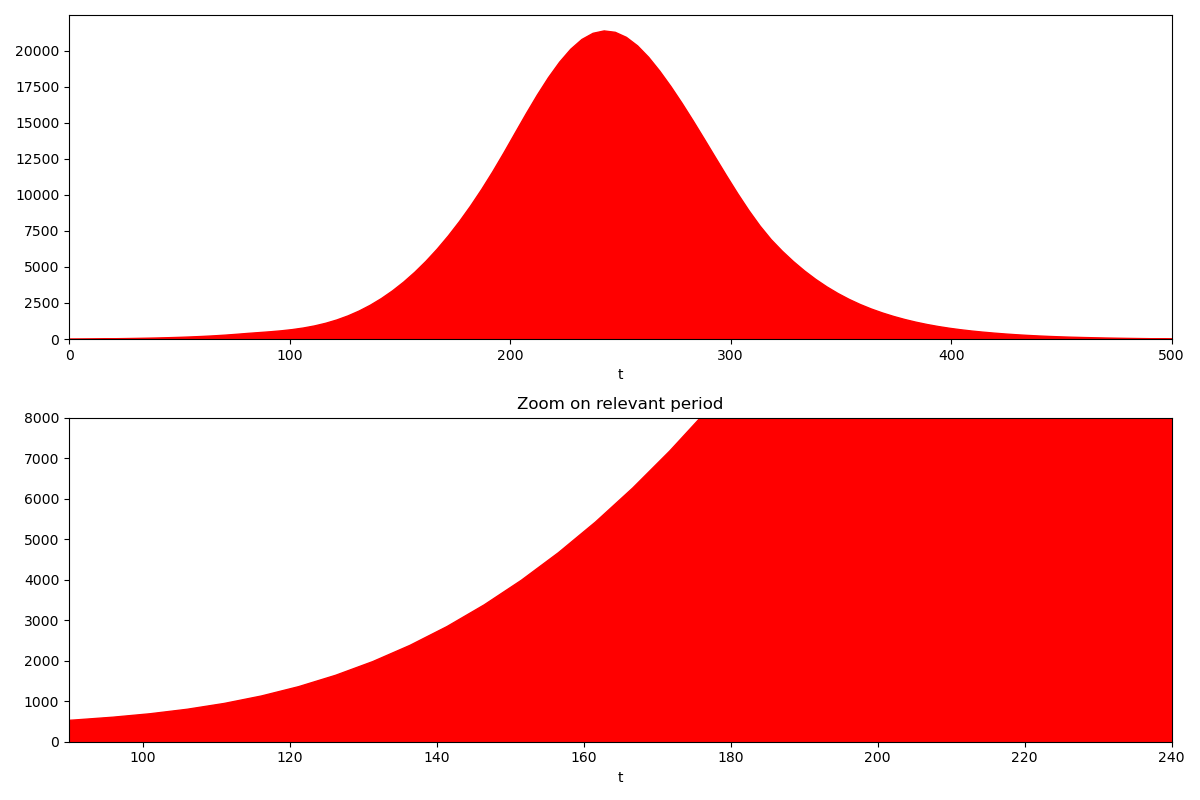

In [9]:
curRes = sch1.result 
RTs = 1 - curRes.y.sum(axis=0)

DKpop = 5800000

# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.fill_between(curRes.t,curRes.Y*DKpop,color='r',label='Delta')
ax2.fill_between(curRes.t,curRes.Y*DKpop,color='r',label='Delta')

t_width = 30*5
t_init = 90 # Approximately 2021-10-01

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000)
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax2.set_xlim([t_init,t_init+t_width])

ax1.set_xlabel('t')
ax2.set_xlabel('t')

ax2.set_title('Total simulated period')
ax2.set_title('Zoom on relevant period')

# ax1.legend(bbox_to_anchor=(1,0.5,0.25,0.1),loc='center right',mode='expand') 
# ax1.set_ylim([0,1])
# ax1.set_xlim([curRes.t[0],curRes.t[-1]])
# ax1.set_xlabel('t')
# ax1.set_ylabel('Share of population')
fig.tight_layout()

# fig.savefig(path_figs+'IthenY')

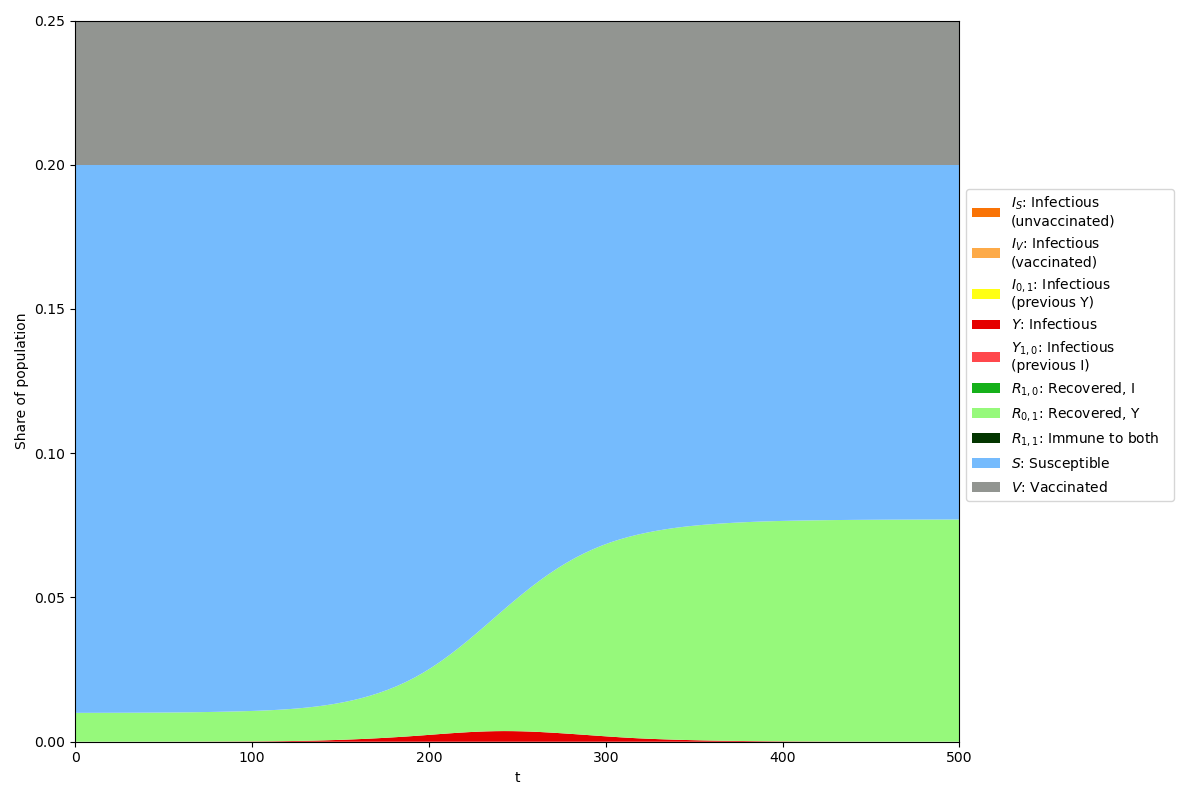

In [10]:
curRes = sch1.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,ax1 = plt.subplots()
curLabels = [   
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$R_{1,0}$: Recovered, I',
                r'$R_{0,1}$: Recovered, Y',
                r'$R_{1,1}$: Immune to both',
                r'$S$: Susceptible',
                r'$V$: Vaccinated'
                ]
curColors = ['xkcd:orange','xkcd:light orange','xkcd:yellow','xkcd:red','xkcd:light red','xkcd:green','xkcd:light green','xkcd:dark green','xkcd:sky blue','xkcd:grey']
ax1.stackplot(curRes.t,
                curRes.IS,
                curRes.IV,
                curRes.I01,
                curRes.Y,
                curRes.Y10,
                curRes.R10,
                curRes.R01,
                RTs,
                curRes.S,
                curRes.V,
                labels=curLabels,colors=curColors)

ax1.legend(bbox_to_anchor=(1,0.5,0.25,0.1),loc='center right',mode='expand') 
ax1.set_ylim([0,1])
ax1.set_ylim([0,0.25])
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax1.set_xlabel('t')
ax1.set_ylabel('Share of population')
fig.tight_layout()

# fig.savefig(path_figs+'IthenY')

In [11]:
tChange = t_init + 50
tChange = t_init + 40
toAdd = iniInf
dictToAdd =  {  
    'S' : -toAdd,
    'IS' : toAdd,
}
addI = pmf.Change(tChange, AddVariables=dictToAdd)

sch2 = sch1.copy()
sch2.addChange(addI)
sch2.simulate()

In [12]:
print(sch2)

-------
Model: OmikronDeltaFull.
Complete simulation running from t=0 until t=500
Initial conditions: {'S': 0.18999499999999994, 'V': 0.8, 'IS': 0, 'IV': 0, 'Y': 5e-06, 'R01': 0.009999999999999998, 'R10': 0, 'I01': 0, 'Y10': 0}
Parameters: {'beta_IS_S': 0.2857142857142857, 'beta_IV_S': 0.2857142857142857, 'beta_I01_S': 0.2857142857142857, 'beta_IS_V': 0.2857142857142857, 'beta_IV_V': 0.2857142857142857, 'beta_I01_V': 0.2857142857142857, 'beta_IS_R01': 0.2857142857142857, 'beta_IV_R01': 0.2857142857142857, 'beta_I01_R01': 0.2857142857142857, 'beta_Y_S': 0.9285714285714285, 'beta_Y10_S': 0.9285714285714285, 'beta_Y_R10': 0.9285714285714285, 'beta_Y10_R10': 0.9285714285714285, 'gamma_IS': 0.14285714285714285, 'gamma_IV': 0.14285714285714285, 'gamma_Y': 0.14285714285714285, 'gamma_I01': 0.14285714285714285, 'gamma_Y10': 0.14285714285714285}
---
Changes: 
Change 0: At time 130, add S: -5e-06, IS: 5e-06 to variables
---


(90.0, 240.0)

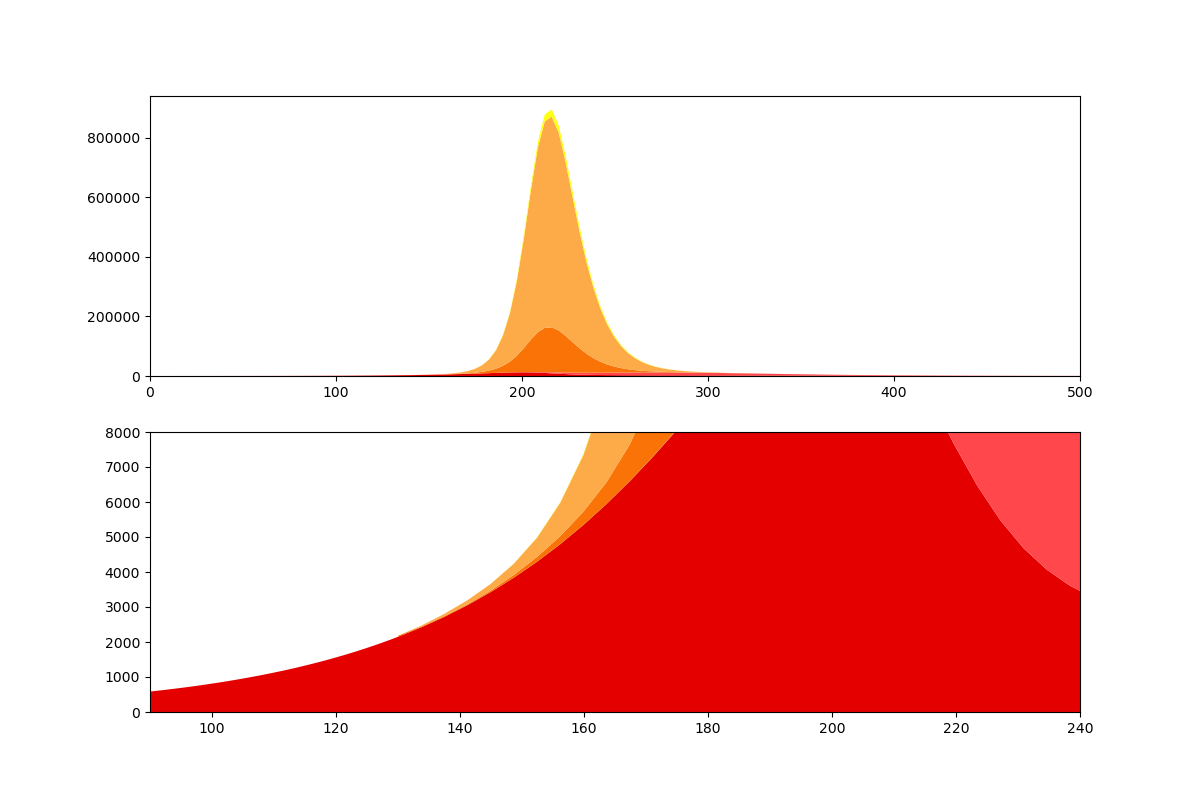

In [13]:
curRes = sch2.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,(ax1,ax2) = plt.subplots(2,1)
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                ]
curColors = ['xkcd:red','xkcd:light red','xkcd:orange','xkcd:light orange','xkcd:yellow']
                
for ax in (ax1,ax2):
    ax.stackplot(curRes.t,
                DKpop*curRes.Y,
                DKpop*curRes.Y10,
                DKpop*curRes.IS,
                DKpop*curRes.IV,
                DKpop*curRes.I01,
                labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 90

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000)
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax2.set_xlim([t_init,t_init+t_width])

# Try with lockdown mid december (-ish) 

In [14]:

# dictToMult = {
# 'beta_IS_S' : betaMult_I,
# 'beta_IV_S' : betaMult_I,
# 'beta_I01_S' : betaMult_I,
# 'beta_IS_V' : betaMult_I,
# 'beta_IV_V' : betaMult_I,
# 'beta_I01_V' : betaMult_I,
# 'beta_IS_R01' : betaMult_I,
# 'beta_IV_R01' : betaMult_I,
# 'beta_I01_R01' : betaMult_I,
# 'beta_Y_S' : betaMult_Y,
# 'beta_Y10_S' : betaMult_Y,
# 'beta_Y_R10' : betaMult_Y,
# 'beta_Y10_R10' : betaMult_Y,
# 'gamma_IS' : 1,
# 'gamma_IV' : 1,
# 'gamma_Y' : 1,
# 'gamma_I01' : 1,
# 'gamma_Y10' : 1,
# }

In [15]:
tChange2 = t_init + 75 # Approximately December 15th
betaMult = 0.65
betaMult_Y = betaMult 
betaMult_I = betaMult 
# betaMult = 0.7
# betaMult_Y = betaMult *0.8
# betaMult_I = betaMult 
dictToMult = {
'beta_IS_S' : betaMult_I,
'beta_IV_S' : betaMult_I,
'beta_I01_S' : betaMult_I,
'beta_IS_V' : betaMult_I,
'beta_IV_V' : betaMult_I,
'beta_I01_V' : betaMult_I,
'beta_IS_R01' : betaMult_I,
'beta_IV_R01' : betaMult_I,
'beta_I01_R01' : betaMult_I,
'beta_Y_S' : betaMult_Y,
'beta_Y10_S' : betaMult_Y,
'beta_Y_R10' : betaMult_Y,
'beta_Y10_R10' : betaMult_Y,
}

betaMultChange = pmf.Change(tChange2, MultiplyParameters=dictToMult)

sch3 = sch2.copy()
sch3.addChange(betaMultChange)
sch3.sortChanges()
sch3.simulate()

(90.0, 240.0)

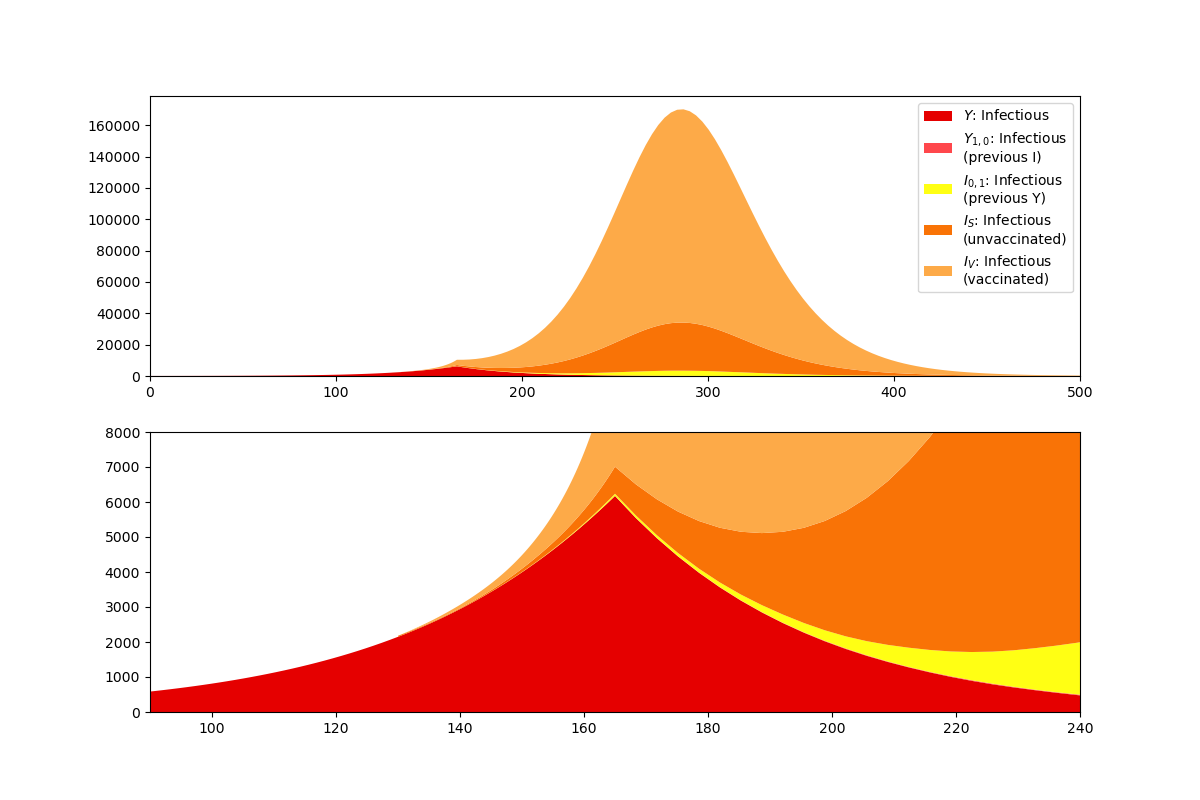

In [16]:
curRes = sch3.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,(ax1,ax2) = plt.subplots(2,1)
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                ]
curColors = ['xkcd:red','xkcd:light red','xkcd:yellow','xkcd:orange','xkcd:light orange']
                
for ax in (ax1,ax2):
    ax.stackplot(curRes.t,
                DKpop*curRes.Y,
                DKpop*curRes.Y10,
                DKpop*curRes.I01,
                DKpop*curRes.IS,
                DKpop*curRes.IV,
                labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 90

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000)
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax2.set_xlim([t_init,t_init+t_width])

# Try with some partial immunity, reflected by lower betas

In [17]:
tChange2 = t_init + 75 # Approximately December 15th
betaMult = 1
betaMult_Y = betaMult *0.6
betaMult_I = betaMult
betaMult_I_V = betaMult * 0.6
betaMult_I_R = betaMult * 0.6
# betaMult = 0.7
# betaMult_Y = betaMult *0.8
# betaMult_I = betaMult 
dictToMult = {
'beta_IS_S' : betaMult_I,
'beta_IV_S' : betaMult_I,
'beta_I01_S' : betaMult_I,
'beta_IS_V' : betaMult_I_V,
'beta_IV_V' : betaMult_I_V,
'beta_I01_V' : betaMult_I_V,
'beta_IS_R01' : betaMult_I_R,
'beta_IV_R01' : betaMult_I_R,
'beta_I01_R01' : betaMult_I_R,
'beta_Y_S' : betaMult_Y,
'beta_Y10_S' : betaMult_Y,
'beta_Y_R10' : betaMult_Y,
'beta_Y10_R10' : betaMult_Y,
}
betaMultChange = pmf.Change(tChange2, MultiplyParameters=dictToMult)

sch4 = sch2.copy()
sch4.addChange(betaMultChange)
sch4.sortChanges()
sch4.simulate()

(90.0, 240.0)

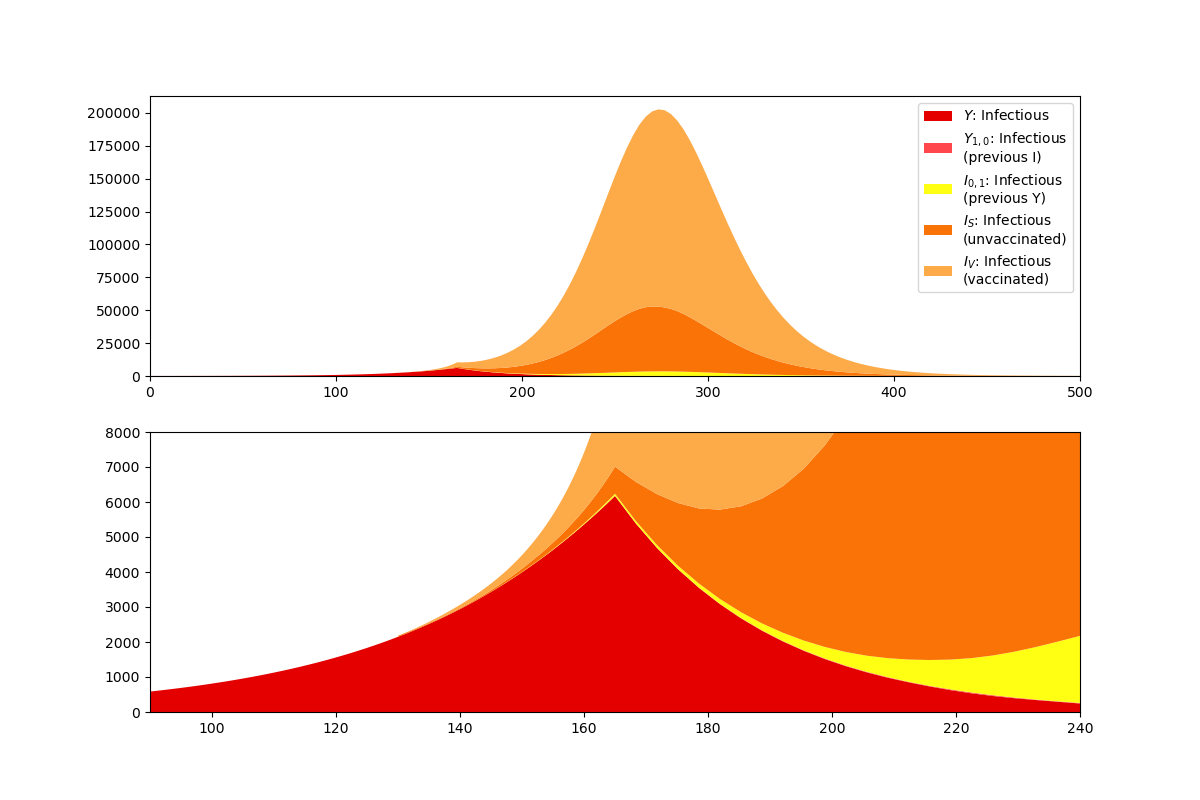

In [18]:
curRes = sch4.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,(ax1,ax2) = plt.subplots(2,1)
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                ]
curColors = ['xkcd:red','xkcd:light red','xkcd:yellow','xkcd:orange','xkcd:light orange']
                
for ax in (ax1,ax2):
    ax.stackplot(curRes.t,
                DKpop*curRes.Y,
                DKpop*curRes.Y10,
                DKpop*curRes.I01,
                DKpop*curRes.IS,
                DKpop*curRes.IV,
                labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 90

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000)
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax2.set_xlim([t_init,t_init+t_width])

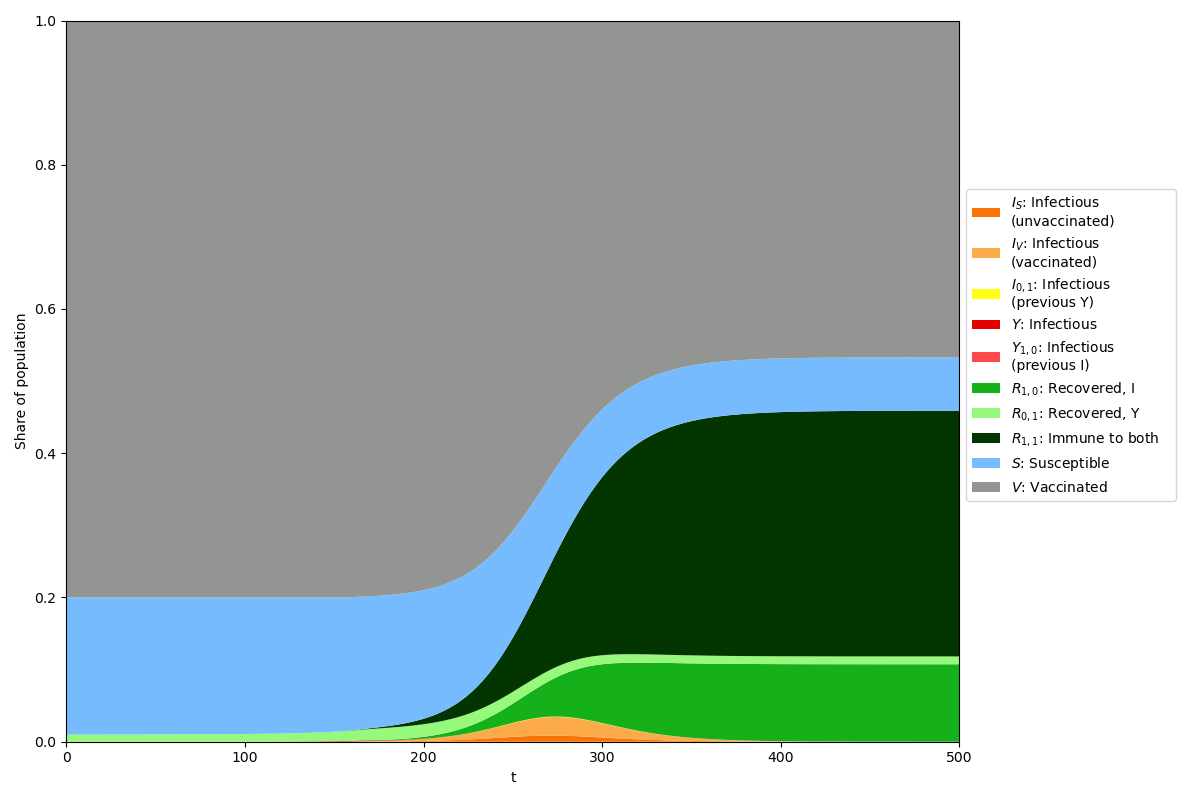

In [19]:
curRes = sch4.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,ax1 = plt.subplots()
curLabels = [   
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$R_{1,0}$: Recovered, I',
                r'$R_{0,1}$: Recovered, Y',
                r'$R_{1,1}$: Immune to both',
                r'$S$: Susceptible',
                r'$V$: Vaccinated'
                ]
curColors = ['xkcd:orange','xkcd:light orange','xkcd:yellow','xkcd:red','xkcd:light red','xkcd:green','xkcd:light green','xkcd:dark green','xkcd:sky blue','xkcd:grey']
ax1.stackplot(curRes.t,
                curRes.IS,
                curRes.IV,
                curRes.I01,
                curRes.Y,
                curRes.Y10,
                curRes.R10,
                curRes.R01,
                RTs,
                curRes.S,
                curRes.V,
                labels=curLabels,colors=curColors)

ax1.legend(bbox_to_anchor=(1,0.5,0.25,0.1),loc='center right',mode='expand') 
ax1.set_ylim([0,1])
# ax1.set_ylim([0,0.25])
ax1.set_xlim([curRes.t[0],curRes.t[-1]])
ax1.set_xlabel('t')
ax1.set_ylabel('Share of population')
fig.tight_layout()

# fig.savefig(path_figs+'IthenY')

# Make a direct comparison with data

In [20]:

df = pd.read_csv('OmikronDeltaData.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Cut off everything before 2021-10-01
df = df[df.Date >= np.datetime64('2021-10-01')]
df = df.reset_index()
df

,index,Date,Total,Delta,Omikron,Reinfections
0,273,2021-10-01,401,4.010000e+02,0.0,7
1,274,2021-10-02,325,3.250000e+02,0.0,2
2,275,2021-10-03,409,4.090000e+02,0.0,5
3,276,2021-10-04,552,5.520000e+02,0.0,6
4,277,2021-10-05,566,5.660000e+02,0.0,8
...,...,...,...,...,...,...
134,407,2022-02-12,32624,7.243983e-12,32624.0,1673
135,408,2022-02-13,35589,7.902345e-12,35589.0,1792
136,409,2022-02-14,45206,0.000000e+00,45206.0,2362
137,410,2022-02-15,41982,0.000000e+00,41982.0,2251


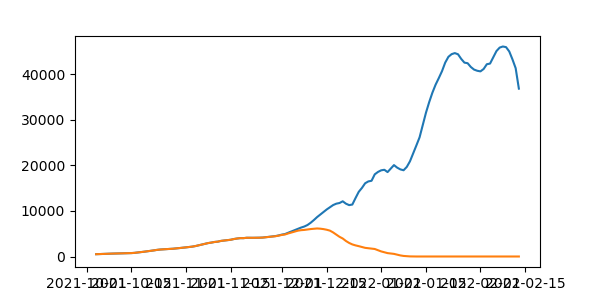

In [21]:
fig,ax1 = plt.subplots(figsize=(6,3))
ax1.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Total,7))
ax1.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Delta,7))


In [22]:
numDaysToSim = len(df.Date)
DateRestrictions = np.where(df.Date == np.datetime64('2021-12-15'))[0][0]
DateNewYears = np.where(df.Date == np.datetime64('2022-01-01'))[0][0]
DateRestrictionsEnd = np.where(df.Date == np.datetime64('2022-01-15'))[0][0]

In [23]:
# Initialize everything
DarkNumberRatio = 1.3
iniInf = DarkNumberRatio * df.Total[0:3].sum()/DKpop
iniVacc = 0.8 # Approximately DK's vaccinationsrate at the end of summer 2021
iniImmu = 0.05 # Approximation. Should only be "natural immunity"
iniImmu = iniImmu * (1-iniVacc) # For splitting previous infections between vaccinated and susceptible

V_0 = iniVacc 
IS_0 = 0
IV_0 = 0
Y_0 = iniInf
R01_0 = iniImmu
R10_0 = 0
I01_0 = 0
Y10_0 = 0
S_0 = 1 - V_0 - IS_0 - IV_0 - Y_0 - R01_0 - R10_0 - I01_0 - Y10_0 

init = {    
    'S' : S_0,
    'V' : V_0,
    'IS' : IS_0,
    'IV' : IV_0,
    'Y' : Y_0,
    'R01' : R01_0,
    'R10' : R10_0,
    'I01' : I01_0,
    'Y10' : Y10_0,
}

# gammas = 1/7
gammas = 1/(4.7)
beta_Y = 6.5*gammas
beta_I = 2*gammas
# beta_I = 1.5*gammas

pars = {
    'beta_IS_S' : beta_I,
    'beta_IV_S' : beta_I,
    'beta_I01_S' : beta_I,
    'beta_IS_V' : beta_I,
    'beta_IV_V' : beta_I,
    'beta_I01_V' : beta_I,
    'beta_IS_R01' : beta_I,
    'beta_IV_R01' : beta_I,
    'beta_I01_R01' : beta_I,
    'beta_Y_S' : beta_Y,
    'beta_Y10_S' : beta_Y,
    'beta_Y_R10' : beta_Y,
    'beta_Y10_R10' : beta_Y,
    'gamma_IS' : gammas,
    'gamma_IV' : gammas,
    'gamma_Y' : gammas,
    'gamma_I01' : gammas,
    'gamma_Y10' : gammas,
    }


In [24]:
tLock = DateRestrictions
betaMult = 0.5
betaMult_Y = betaMult 
betaMult_I = betaMult 
# betaMult = 0.7
# betaMult_Y = betaMult *0.8
# betaMult_I = betaMult 
dictToMult = {
'beta_IS_S' : betaMult_I,
'beta_IV_S' : betaMult_I,
'beta_I01_S' : betaMult_I,
'beta_IS_V' : betaMult_I,
'beta_IV_V' : betaMult_I,
'beta_I01_V' : betaMult_I,
'beta_IS_R01' : betaMult_I,
'beta_IV_R01' : betaMult_I,
'beta_I01_R01' : betaMult_I,
'beta_Y_S' : betaMult_Y,
'beta_Y10_S' : betaMult_Y,
'beta_Y_R10' : betaMult_Y,
'beta_Y10_R10' : betaMult_Y,
'gamma_IS' : 1,
'gamma_IV' : 1,
'gamma_Y' : 1,
'gamma_I01' : 1,
'gamma_Y10' : 1,
}
betaMultChange = pmf.Change(tLock, MultiplyParameters=dictToMult)

tEnd = numDaysToSim
sch1 = pmf.Scheme('OmikronDeltaFull',init,pars,0,tEnd,Changes=[])
sch1.addChange(betaMultChange)

In [25]:
sch1.simulate(tRes=1000)

In [26]:
curT = sch1.result.t
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x)),'D') for x in curT])
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x*24)),'h') for x in curT])
# asdf = pd.DataFrame() 
# asdf['d'] = curDays
# curDays = asdf.d.values
# np.timedelta64(int(np.round(curT[3])),'D')

(0.0, 32000.0)

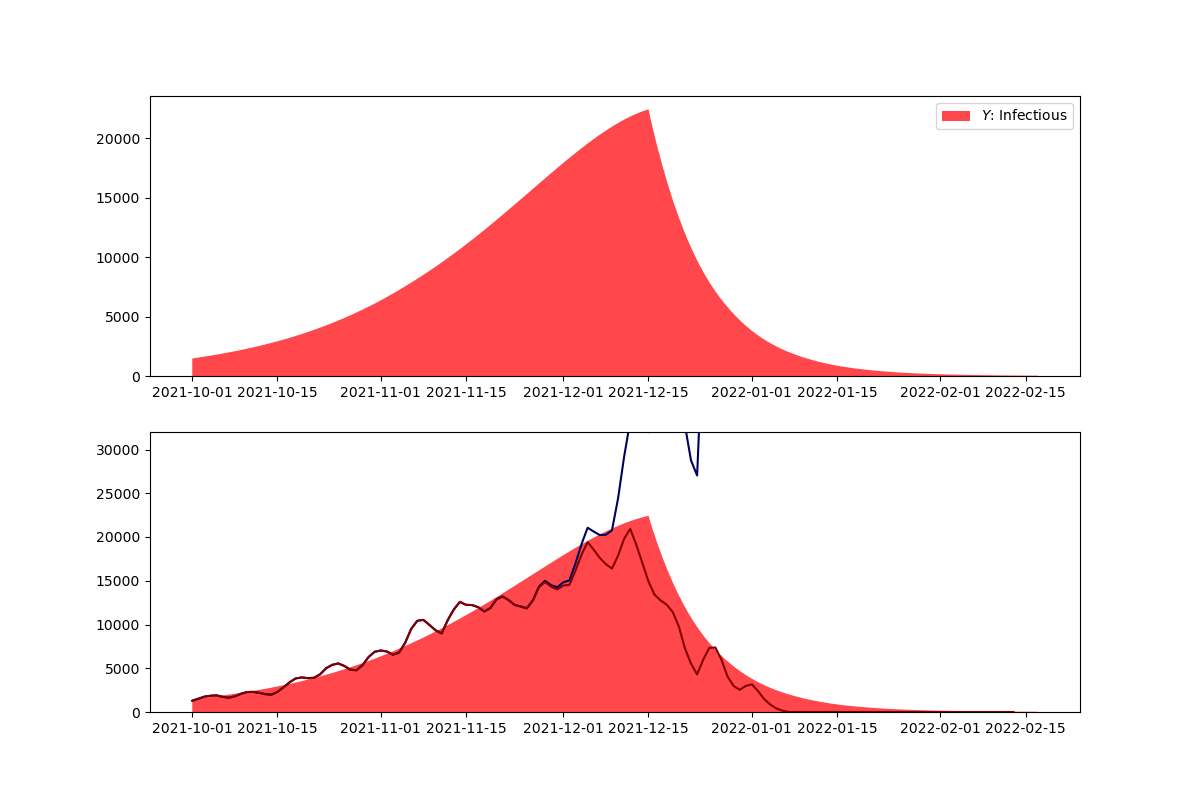

In [27]:
curRes = sch1.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,(ax1,ax2) = plt.subplots(2,1)
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                ]
curColors = ['xkcd:light red','xkcd:light red','xkcd:yellow','xkcd:orange','xkcd:light orange']

# for ax in (ax1,ax2):
#     ax.stackplot(curDays,
#                 DKpop*curRes.Y,
#                 # DKpop*curRes.Y10,
#                 # DKpop*curRes.I01,
#                 # DKpop*curRes.IS,
#                 # DKpop*curRes.IV,
#                 labels=curLabels,colors=curColors)
ax1.stackplot(curDays,
            DKpop*curRes.Y,
            labels=curLabels,colors=curColors)
ax2.stackplot(curDays,
            DKpop*curRes.Y,
            labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 30

# ax2.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Delta,7)*DarkNumberRatio,'b')
appDataY = np.cumsum(df.Delta)[3:].values - np.cumsum(df.Delta)[:-3].values
appDataI = np.cumsum(df.Omikron)[3:].values - np.cumsum(df.Omikron)[:-3].values
ax2.plot(df.Date[:-3],appDataI+appDataY,color='xkcd:dark blue')
ax2.plot(df.Date[:-3],appDataY,color='xkcd:dark red')


ax1.legend()

ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000*4)
# ax1.set_xlim([curRes.t[0],curRes.t[-1]])
# ax2.set_xlim([t_init,t_init+t_width])

# Same, but with Omikron as well

In [28]:
# Initialize everything
DarkNumberRatio = 1.3
iniInf = DarkNumberRatio * df.Total[0:3].sum()/DKpop
iniVacc = 0.8 # Approximately DK's vaccinationsrate at the end of summer 2021
iniImmu = 0.05 # Approximation. Should only be "natural immunity"
iniImmu = 0.1 # Approximation. Should only be "natural immunity"
iniImmu = iniImmu * (1-iniVacc) # For splitting previous infections between vaccinated and susceptible

V_0 = iniVacc 
IS_0 = 0
IV_0 = 0
Y_0 = iniInf
R01_0 = iniImmu
R10_0 = 0
I01_0 = 0
Y10_0 = 0
S_0 = 1 - V_0 - IS_0 - IV_0 - Y_0 - R01_0 - R10_0 - I01_0 - Y10_0 

init = {'S' : S_0,'V' : V_0,'IS' : IS_0,'IV' : IV_0,'Y' : Y_0,'R01' : R01_0,'R10' : R10_0,'I01' : I01_0,'Y10' : Y10_0}

# gammas = 1/7
gammas = 1/(4.7)
# beta_Y = 6.5*gammas
beta_Y = 6.8*gammas
beta_I = 1.9*gammas
# beta_I = 2.5*gammas
# beta_I = 1.5*gammas
pars = {'beta_IS_S' : beta_I,'beta_IV_S' : beta_I,'beta_I01_S' : beta_I,'beta_IS_V' : beta_I,'beta_IV_V' : beta_I,'beta_I01_V' : beta_I,'beta_IS_R01' : beta_I,'beta_IV_R01' : beta_I,'beta_I01_R01' : beta_I,'beta_Y_S' : beta_Y,'beta_Y10_S' : beta_Y,'beta_Y_R10' : beta_Y,'beta_Y10_R10' : beta_Y,'gamma_IS' : gammas,'gamma_IV' : gammas,'gamma_Y' : gammas,'gamma_I01' : gammas,'gamma_Y10' : gammas}


In [29]:
tLock = DateRestrictions 
betaMult = 0.65
# betaMult_Y = betaMult *0.8
betaMult_Y = betaMult 
betaMult_I = betaMult 
# betaMult = 0.7
# betaMult_Y = betaMult *0.8
# betaMult_I = betaMult 
dictToMult = {'beta_IS_S' : betaMult_I,'beta_IV_S' : betaMult_I,'beta_I01_S' : betaMult_I,'beta_IS_V' : betaMult_I,'beta_IV_V' : betaMult_I,'beta_I01_V' : betaMult_I,'beta_IS_R01' : betaMult_I,'beta_IV_R01' : betaMult_I,'beta_I01_R01' : betaMult_I,'beta_Y_S' : betaMult_Y,'beta_Y10_S' : betaMult_Y,'beta_Y_R10' : betaMult_Y,'beta_Y10_R10' : betaMult_Y,'gamma_IS' : 1,'gamma_IV' : 1,'gamma_Y' : 1,'gamma_I01' : 1,'gamma_Y10' : 1,}
betaMultChange = pmf.Change(tLock, MultiplyParameters=dictToMult)


In [30]:
tLockStop = DateNewYears + 4
tLockStop = DateNewYears + 50
# betaMult_Y = 1/dictToMult['beta_Y_S'] 
# betaMult_I = 1/dictToMult['beta_IS_S']
betaMult_Y = 1/dictToMult['beta_Y_S'] 
betaMult_I = 1/dictToMult['beta_IS_S']
# betaMult_I =0.9* 1/dictToMult['beta_IS_S']
dictToMultEnd = {'beta_IS_S' : betaMult_I,'beta_IV_S' : betaMult_I,'beta_I01_S' : betaMult_I,'beta_IS_V' : betaMult_I,'beta_IV_V' : betaMult_I,'beta_I01_V' : betaMult_I,'beta_IS_R01' : betaMult_I,'beta_IV_R01' : betaMult_I,'beta_I01_R01' : betaMult_I,'beta_Y_S' : betaMult_Y,'beta_Y10_S' : betaMult_Y,'beta_Y_R10' : betaMult_Y,'beta_Y10_R10' : betaMult_Y,'gamma_IS' : 1,'gamma_IV' : 1,'gamma_Y' : 1,'gamma_I01' : 1,'gamma_Y10' : 1,}
betaMultChangeBack = pmf.Change(tLockStop, MultiplyParameters=dictToMultEnd)

In [45]:
tChange = 50
# tChange = 52
# tChange = 30
toAdd = iniInf/10
dictToAdd =  {  
    'S' : -toAdd,
    'IS' : toAdd,
}
addI = pmf.Change(tChange, AddVariables=dictToAdd)

tEnd = numDaysToSim+150
sch2 = pmf.Scheme('OmikronDeltaFull',init,pars,0,tEnd,Changes=[])
sch2.addChange(betaMultChange)
# sch2.addChange(betaMultChangeBack)

sch2.addChange(addI)
sch2.sortChanges()
sch2.simulate()

In [46]:
0.65 *sch2.Parameters['beta_IS_S']  / gammas
# sch2.Changes[1].MultiplyParameters

1.235

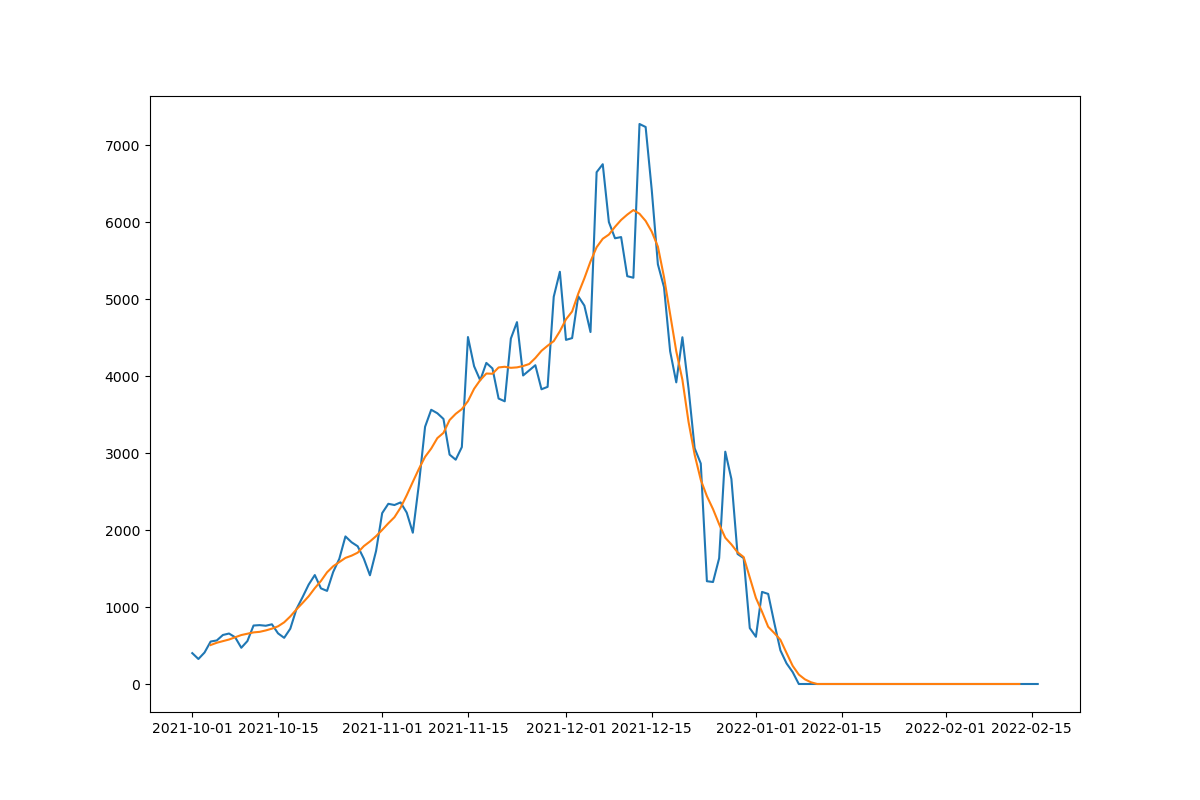

In [47]:
# print(sch2)
plt.figure() 
plt.plot(df.Date,df.Delta)
plt.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Delta,7))

(0.0, 40000.0)

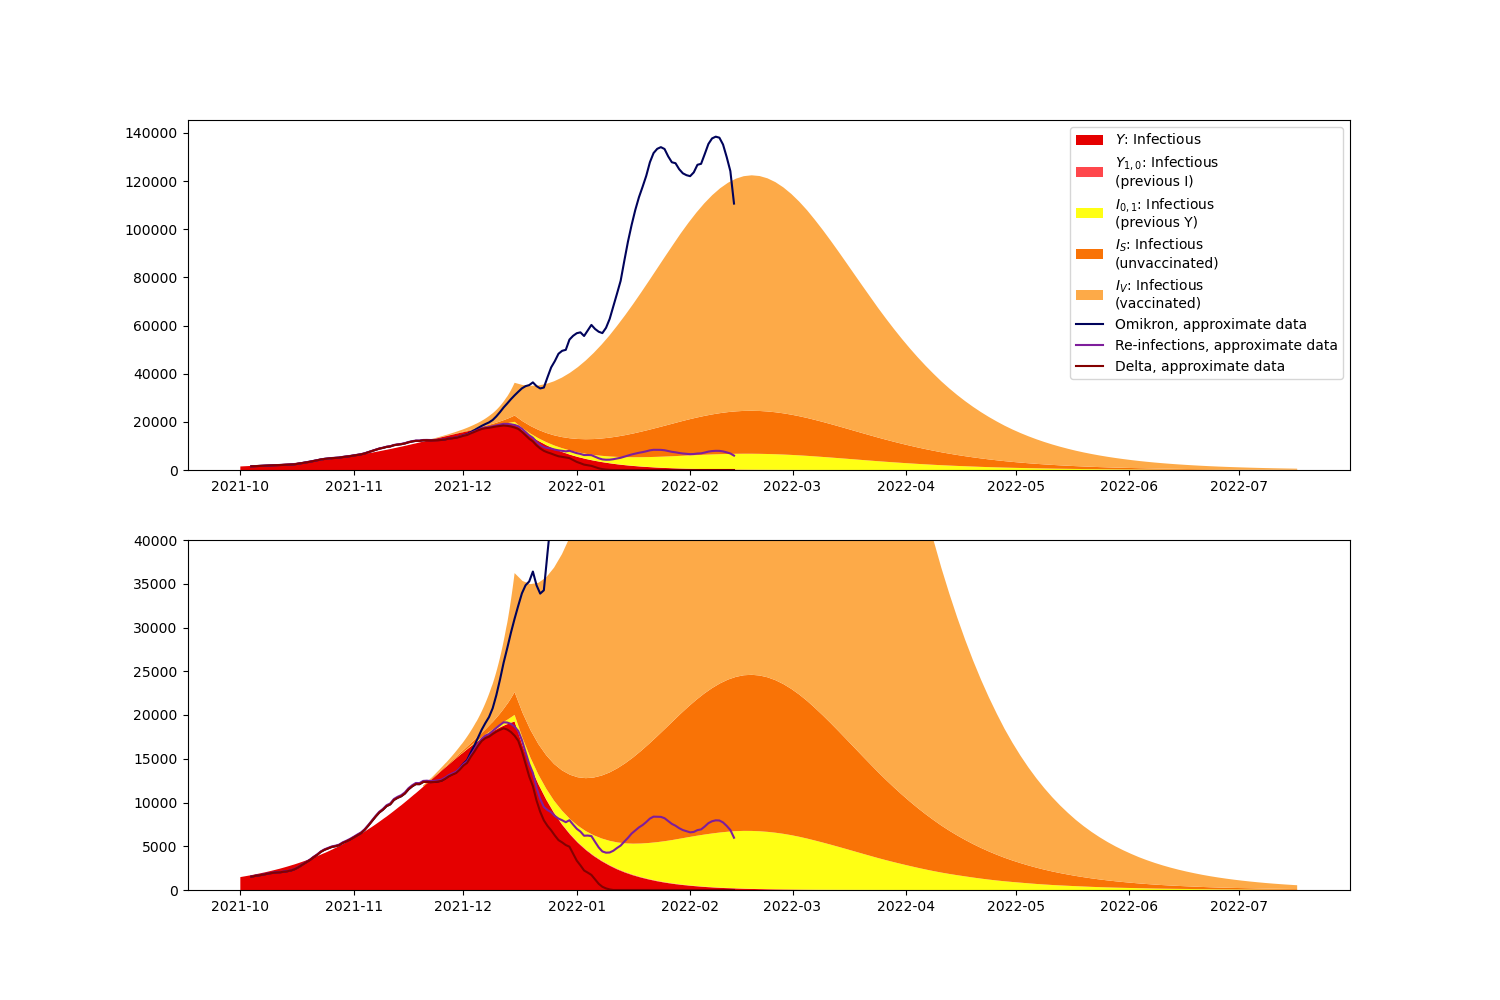

In [48]:
curRes = sch2.result 
RTs = 1 - curRes.y.sum(axis=0)

curT = sch2.result.t
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x)),'D') for x in curT])
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x*24)),'h') for x in curT])

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                ]
curColors = ['xkcd:red','xkcd:light red','xkcd:yellow','xkcd:orange','xkcd:light orange']

for ax in (ax1,ax2):
    ax.stackplot(curDays,
                DKpop*curRes.Y,
                DKpop*curRes.Y10,
                DKpop*curRes.I01,
                DKpop*curRes.IS,
                DKpop*curRes.IV,
                labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 30

# # ax2.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Delta,7)*DarkNumberRatio,'b')
# appDataDate = df.Date[:-3]
# appDataY = np.cumsum(df.Delta)[3:].values - np.cumsum(df.Delta)[:-3].values
# appDataI = np.cumsum(df.Omikron)[3:].values - np.cumsum(df.Omikron)[:-3].values
# appDataRe = np.cumsum(df.Reinfections)[3:].values - np.cumsum(df.Reinfections)[:-3].values

# ax2.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='3-day sum of new cases, Omikron')
# ax2.plot(appDataDate,appDataY,color='xkcd:dark red',label='3-day sum of new cases, Delta')
# ax2.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='3-day sum of new cases, Re-infections')

# ax1.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='3-day sum of new cases, Omikron')
# ax1.plot(appDataDate,appDataY,color='xkcd:dark red',label='3-day sum of new cases, Delta')
# ax1.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='3-day sum of new cases, Re-infections')


appDataDate = pf.rnTime(df.Date,7)
appDataY = pf.rnMean(df.Delta.values,7)*3
appDataI = pf.rnMean(df.Omikron.values,7)*3
appDataRe = pf.rnMean(df.Reinfections.values,7)*3

ax2.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='Omikron, approximate data')
ax2.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='Re-infections, approximate data')
ax2.plot(appDataDate,appDataY,color='xkcd:dark red',label='Delta, approximate data')

ax1.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='Omikron, approximate data')
ax1.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='Re-infections, approximate data')
ax1.plot(appDataDate,appDataY,color='xkcd:dark red',label='Delta, approximate data')


# ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[0].t,'D'),color='k',linestyle=':',label='Introduction of Omikron')
# # ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[1].t,'D'),color='b',linestyle=':',label='Restrictions')
# ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[0].t,'D'),color='k',linestyle=':')
# # ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[1].t,'D'),color='b',linestyle=':')
# # ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[2].t,'D'),color='g',linestyle=':',label='Restrictions stop')
# # ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[2].t,'D'),color='g',linestyle=':')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000*5)
# ax1.set_xlim([curRes.t[0],curRes.t[-1]])
# ax2.set_xlim([t_init,t_init+t_width])

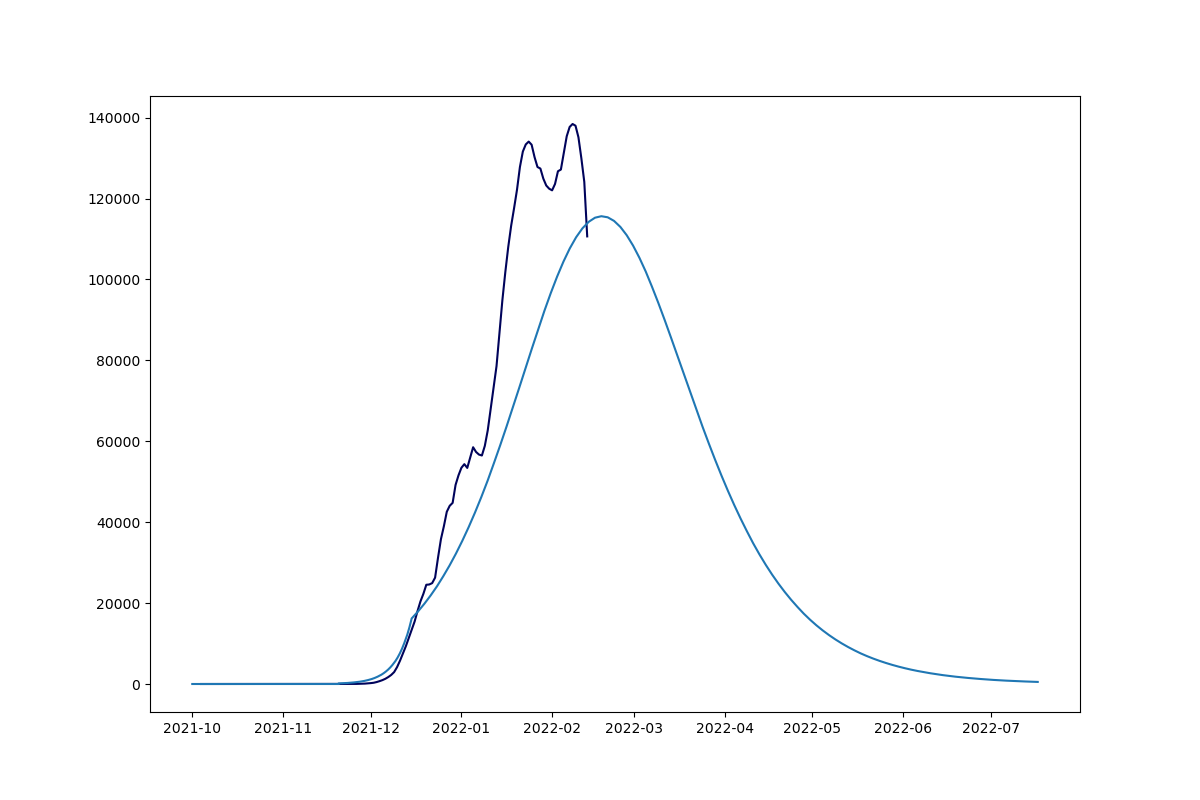

In [49]:
fig,ax1 = plt.subplots()
ax1.plot(appDataDate,appDataI,color='xkcd:dark blue',label='Omikron, approximate data')
ax1.plot(curDays,DKpop*(curRes.IS+curRes.IV))

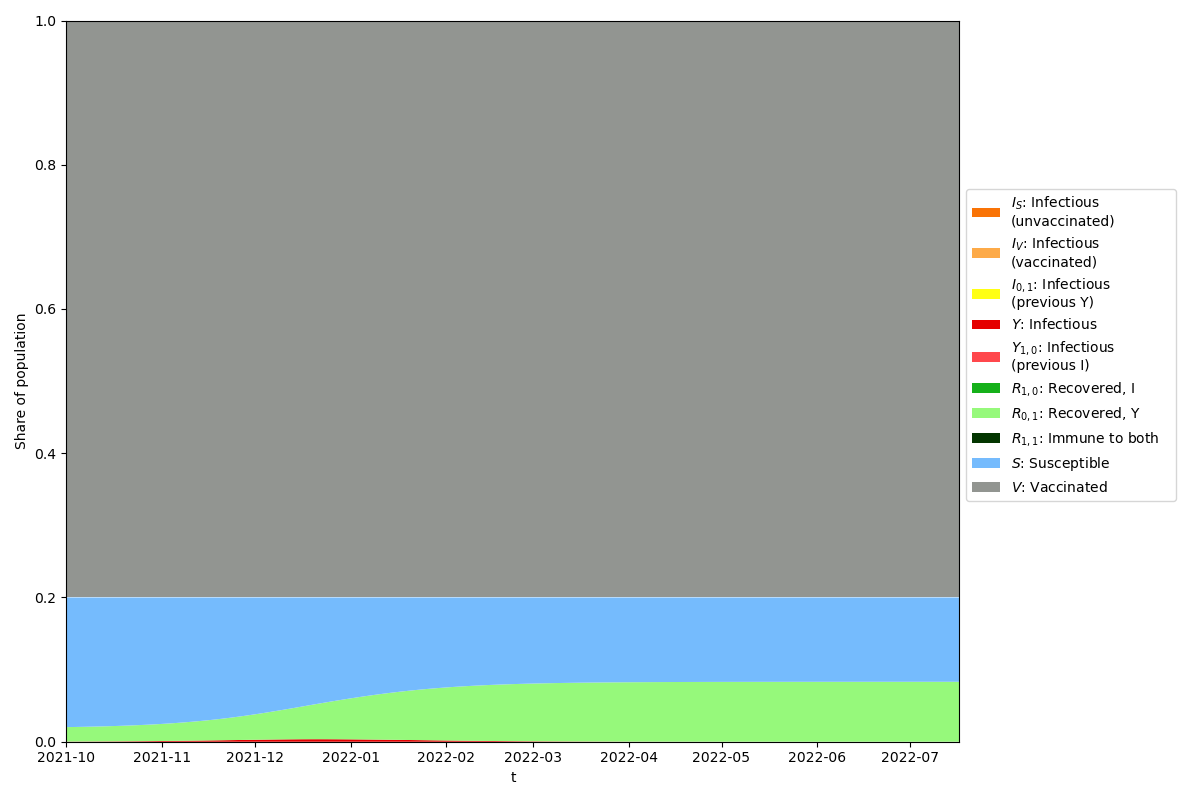

In [36]:
curRes = sch2.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,ax1 = plt.subplots()
curLabels = [   
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$R_{1,0}$: Recovered, I',
                r'$R_{0,1}$: Recovered, Y',
                r'$R_{1,1}$: Immune to both',
                r'$S$: Susceptible',
                r'$V$: Vaccinated'
                ]
curColors = ['xkcd:orange','xkcd:light orange','xkcd:yellow','xkcd:red','xkcd:light red','xkcd:green','xkcd:light green','xkcd:dark green','xkcd:sky blue','xkcd:grey']
ax1.stackplot(curDays,
                curRes.IS,
                curRes.IV,
                curRes.I01,
                curRes.Y,
                curRes.Y10,
                curRes.R10,
                curRes.R01,
                RTs,
                curRes.S,
                curRes.V,
                labels=curLabels,colors=curColors)

ax1.legend(bbox_to_anchor=(1,0.5,0.25,0.1),loc='center right',mode='expand') 
ax1.set_ylim([0,1])
# ax1.set_ylim([0,0.25])
ax1.set_xlim([curDays[0],curDays[-1]])
ax1.set_xlabel('t')
ax1.set_ylabel('Share of population')
fig.tight_layout()


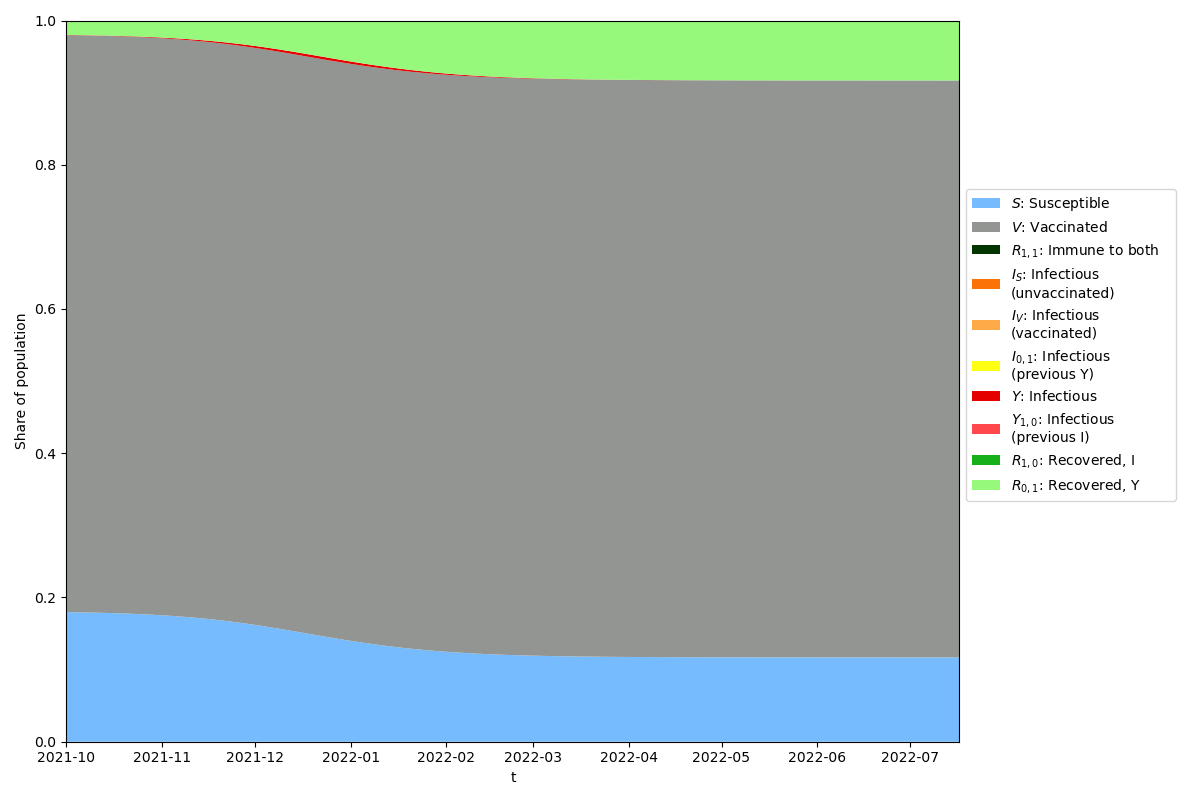

In [37]:
curRes = sch2.result 
RTs = 1 - curRes.y.sum(axis=0)

fig,ax1 = plt.subplots()
curLabels = [   
                r'$S$: Susceptible',
                r'$V$: Vaccinated',
                r'$R_{1,1}$: Immune to both',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$R_{1,0}$: Recovered, I',
                r'$R_{0,1}$: Recovered, Y',
                ]
curColors = ['xkcd:sky blue','xkcd:grey','xkcd:dark green','xkcd:orange','xkcd:light orange','xkcd:yellow','xkcd:red','xkcd:light red','xkcd:green','xkcd:light green']
ax1.stackplot(curDays,
                curRes.S,
                curRes.V,
                RTs,
                curRes.IS,
                curRes.IV,
                curRes.I01,
                curRes.Y,
                curRes.Y10,
                curRes.R10,
                curRes.R01,
                labels=curLabels,colors=curColors)

ax1.legend(bbox_to_anchor=(1,0.5,0.25,0.1),loc='center right',mode='expand') 
ax1.set_ylim([0,1])
# ax1.set_ylim([0,0.25])
ax1.set_xlim([curDays[0],curDays[-1]])
ax1.set_xlabel('t')
ax1.set_ylabel('Share of population')
fig.tight_layout()


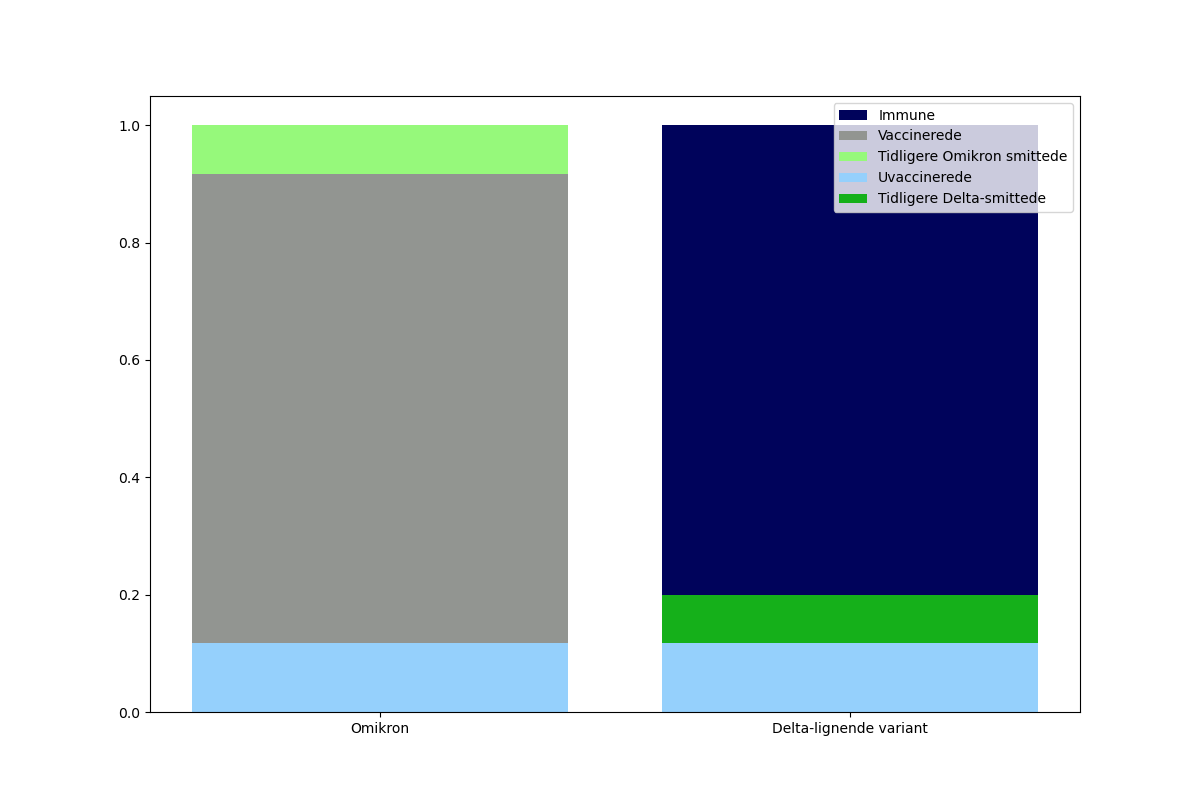

In [38]:
susI = curRes.S[-1] + curRes.V[-1] + curRes.R01[-1]
susY = curRes.S[-1] + curRes.R10[-1]
susY
plt.figure()
plt.bar(0,1,color='xkcd:dark blue',label='Immune')
plt.bar(1,1,color='xkcd:dark blue')
plt.bar(0,curRes.S[-1],color='xkcd:light blue')
plt.bar(0,curRes.V[-1],bottom=curRes.S[-1],color='xkcd:grey',label='Vaccinerede')
plt.bar(0,curRes.R01[-1],bottom=curRes.S[-1]+curRes.V[-1],color='xkcd:light green',label='Tidligere Omikron smittede')
# plt.bar(0,RTs[-1],bottom=curRes.R01[-1]+curRes.S[-1]+curRes.V[-1],color='xkcd:light green')
plt.bar(1,curRes.S[-1],color='xkcd:light blue',label='Uvaccinerede')
plt.bar(1,curRes.R01[-1],bottom=curRes.S[-1],color='xkcd:green',label='Tidligere Delta-smittede')

ax1 = plt.gca()
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Omikron','Delta-lignende variant'])
ax1.legend()

In [39]:
df.tail()

,index,Date,Total,Delta,Omikron,Reinfections
134,407,2022-02-12,32624,7.243983e-12,32624.0,1673
135,408,2022-02-13,35589,7.902345e-12,35589.0,1792
136,409,2022-02-14,45206,0.000000e+00,45206.0,2362
137,410,2022-02-15,41982,0.000000e+00,41982.0,2251
138,411,2022-02-16,18787,0.000000e+00,18787.0,1077


(0.0, 0.5)

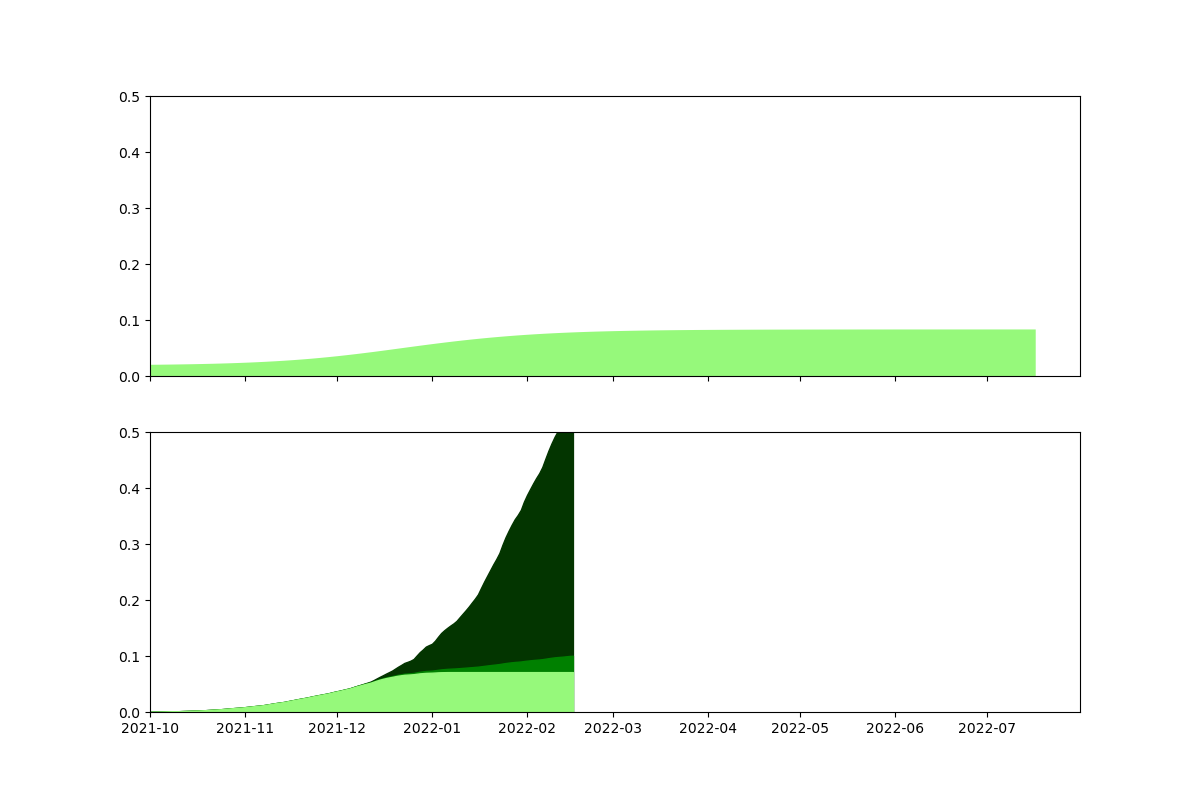

In [40]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# ax1.fill_between(curDays,curRes.R01+RTs,color='xkcd:light green')
# ax1.fill_between(curDays,curRes.R01,color='xkcd:dark green')
# ax1.fill_between(curDays,curRes.R10+curRes.R01+RTs,curRes.R01+RTs,color='k')
ax1.stackplot(curDays,
                curRes.R01,
                curRes.R10,
                RTs,
                colors=['xkcd:light green','g','xkcd:dark green'],
                labels=['R01','R10','R11'])
ax2.fill_between(df.Date,1.5*(np.cumsum(df.Delta)/DKpop+np.cumsum(df.Omikron)/DKpop),color='xkcd:dark green')
ax2.fill_between(df.Date,1.5*(np.cumsum(df.Delta)/DKpop+np.cumsum(df.Reinfections)/DKpop),color='g')
ax2.fill_between(df.Date,1.5*(np.cumsum(df.Delta)/DKpop),color='xkcd:light green')

# ax1.set_xlim(left=df.Date.iloc[0],right=df.Date.iloc[-1])
ax1.set_xlim(left=df.Date.iloc[0])

ax1.set_ylim([0,0.5])
ax2.set_ylim([0,0.5])

(0.0, 0.6)

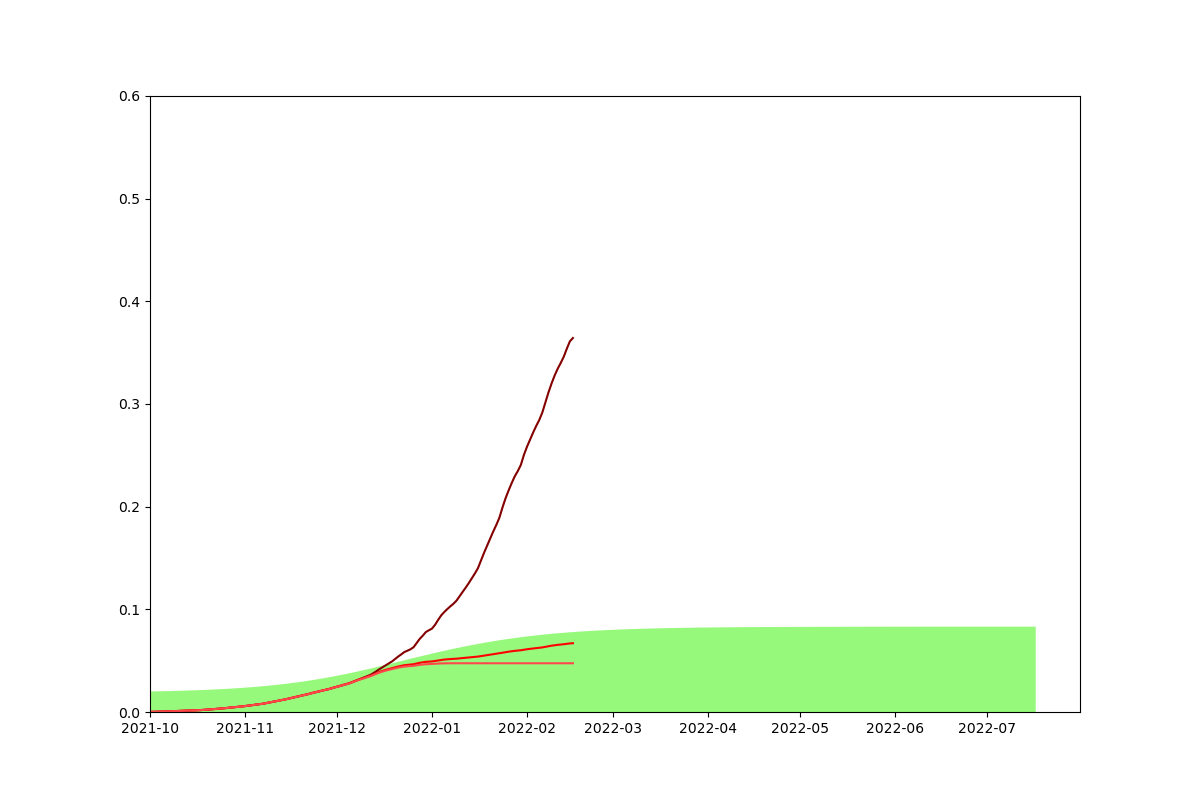

In [41]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,ax1 = plt.subplots()

ax1.stackplot(curDays,
                curRes.R01,
                curRes.R10,
                RTs,
                colors=['xkcd:light green','g','xkcd:dark green'],
                labels=['R01','R10','R11'])
ax1.plot(df.Date,(np.cumsum(df.Delta)/DKpop+np.cumsum(df.Omikron)/DKpop),color='xkcd:dark red')
ax1.plot(df.Date,(np.cumsum(df.Delta)/DKpop+np.cumsum(df.Reinfections)/DKpop),color='r')
ax1.plot(df.Date,(np.cumsum(df.Delta)/DKpop),color='xkcd:light red')

# ax1.set_xlim(left=df.Date.iloc[0],right=df.Date.iloc[-1])
ax1.set_xlim(left=df.Date.iloc[0])

ax1.set_ylim([0,0.6])
# ax2.set_ylim([0,0.5])

# Finally: Is there room for a delta-wave post-omikron?

In [42]:
# tLockStop = DateRestrictionsEnd + 90
tLockStop = 245
betaMult_Y = 1/dictToMult['beta_Y_S'] 
betaMult_I = 1/dictToMult['beta_IS_S']
betaMult_Y = 1.1 * betaMult_Y # A little higher R_0 than original delta
dictToMultEnd = {'beta_IS_S' : betaMult_I,'beta_IV_S' : betaMult_I,'beta_I01_S' : betaMult_I,'beta_IS_V' : betaMult_I,'beta_IV_V' : betaMult_I,'beta_I01_V' : betaMult_I,'beta_IS_R01' : betaMult_I,'beta_IV_R01' : betaMult_I,'beta_I01_R01' : betaMult_I,'beta_Y_S' : betaMult_Y,'beta_Y10_S' : betaMult_Y,'beta_Y_R10' : betaMult_Y,'beta_Y10_R10' : betaMult_Y,'gamma_IS' : 1,'gamma_IV' : 1,'gamma_Y' : 1,'gamma_I01' : 1,'gamma_Y10' : 1,}
betaMultChangeBack = pmf.Change(tLockStop, MultiplyParameters=dictToMultEnd)

tEnd = numDaysToSim+800
sch3 = pmf.Scheme('OmikronDeltaFull',init,pars,0,tEnd,Changes=[])
sch3.addChange(betaMultChange)
sch3.addChange(addI)
sch3.addChange(betaMultChangeBack)

In [43]:
tChange = 250
# tChange = 52
# tChange = 30
toAdd = iniInf/10
dictToAdd =  {  
    'S' : -toAdd,
    'Y' : toAdd,
}
addY = pmf.Change(tChange, AddVariables=dictToAdd)

tChange2 = tChange-1
dictToAdd =  {  
    'S' : 1,
    'V' : 1,
    'IS' : 0,
    'IV' : 0,
    'Y' : 1,
    'R01' : 1,
    'R10' : 1,
    'I01' : 0,
    'Y10' : 1,
}
setItoZero = pmf.Change(tChange2, MultiplyVariables=dictToAdd)


sch3.addChange(setItoZero)
sch3.addChange(addY)

sch3.sortChanges()
sch3.simulate()

IndexError: list index out of range

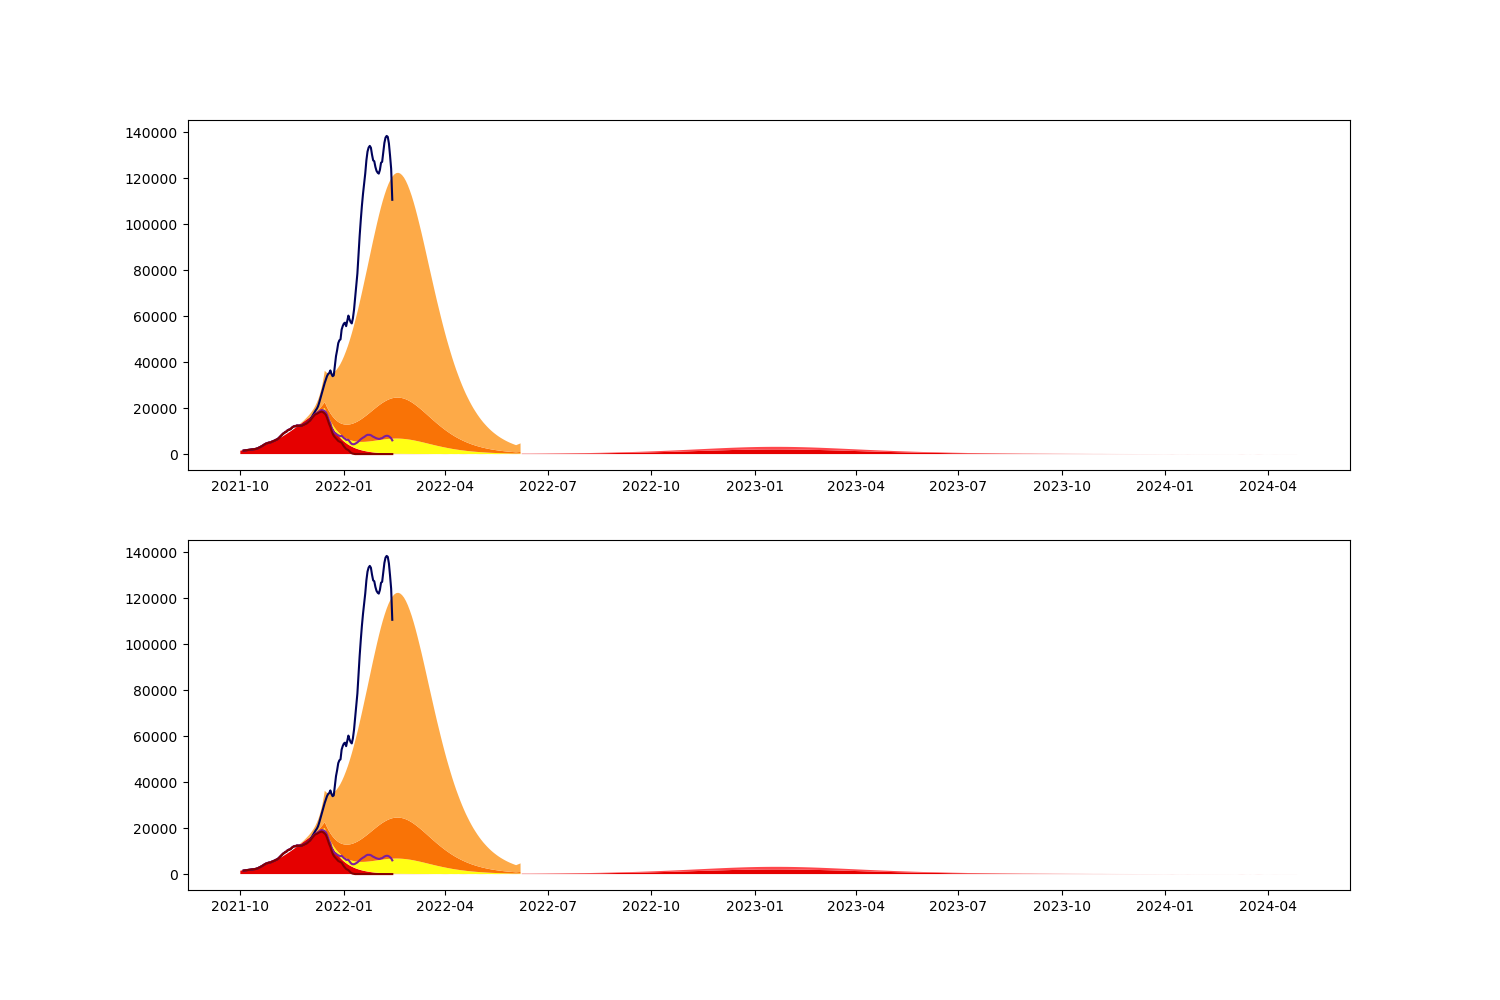

In [44]:
curRes = sch3.result 
RTs = 1 - curRes.y.sum(axis=0)

curT = sch3.result.t
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x)),'D') for x in curT])
curDays = np.datetime64(df.iloc[0].Date)+np.array([np.timedelta64(int(np.round(x*24)),'h') for x in curT])

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
curLabels = [   
                r'$Y$: Infectious',
                r'$Y_{1,0}$: Infectious'+'\n(previous I)',
                r'$I_{0,1}$: Infectious'+'\n(previous Y)',
                r'$I_S$: Infectious'+'\n(unvaccinated)',
                r'$I_V$: Infectious'+'\n(vaccinated)',
                ]
curColors = ['xkcd:red','xkcd:light red','xkcd:yellow','xkcd:orange','xkcd:light orange']

for ax in (ax1,ax2):
    ax.stackplot(curDays,
                DKpop*curRes.Y,
                DKpop*curRes.Y10,
                DKpop*curRes.I01,
                DKpop*curRes.IS,
                DKpop*curRes.IV,
                labels=curLabels,colors=curColors)

t_width = 30*5
t_init = 30

# # ax2.plot(pf.rnTime(df.Date,7),pf.rnMean(df.Delta,7)*DarkNumberRatio,'b')
# appDataDate = df.Date[:-3]
# appDataY = np.cumsum(df.Delta)[3:].values - np.cumsum(df.Delta)[:-3].values
# appDataI = np.cumsum(df.Omikron)[3:].values - np.cumsum(df.Omikron)[:-3].values
# appDataRe = np.cumsum(df.Reinfections)[3:].values - np.cumsum(df.Reinfections)[:-3].values

# ax2.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='3-day sum of new cases, Omikron')
# ax2.plot(appDataDate,appDataY,color='xkcd:dark red',label='3-day sum of new cases, Delta')
# ax2.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='3-day sum of new cases, Re-infections')

# ax1.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='3-day sum of new cases, Omikron')
# ax1.plot(appDataDate,appDataY,color='xkcd:dark red',label='3-day sum of new cases, Delta')
# ax1.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='3-day sum of new cases, Re-infections')


appDataDate = pf.rnTime(df.Date,7)
appDataY = pf.rnMean(df.Delta.values,7)*3
appDataI = pf.rnMean(df.Omikron.values,7)*3
appDataRe = pf.rnMean(df.Reinfections.values,7)*3

ax2.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='Omikron, approximate data')
ax2.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='Re-infections, approximate data')
ax2.plot(appDataDate,appDataY,color='xkcd:dark red',label='Delta, approximate data')

ax1.plot(appDataDate,appDataI+appDataY,color='xkcd:dark blue',label='Omikron, approximate data')
ax1.plot(appDataDate,appDataY+appDataRe,color='xkcd:purple',label='Re-infections, approximate data')
ax1.plot(appDataDate,appDataY,color='xkcd:dark red',label='Delta, approximate data')


ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[0].t,'D'),color='k',linestyle=':',label='Introduction of Omikron')
ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[1].t,'D'),color='b',linestyle=':',label='Restrictions')
ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[0].t,'D'),color='k',linestyle=':')
ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[1].t,'D'),color='b',linestyle=':')
# ax1.axvline(curDays[0]+np.timedelta64(sch2.Changes[2].t,'D'),color='g',linestyle=':',label='Restrictions stop')
# ax2.axvline(curDays[0]+np.timedelta64(sch2.Changes[2].t,'D'),color='g',linestyle=':')

ax1.legend()

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=8000*5)
# ax1.set_xlim([curRes.t[0],curRes.t[-1]])
# ax2.set_xlim([t_init,t_init+t_width])

In [42]:

# int_I = cumtrapz(np.exp(u_H*ts)*Is,ts, initial=0)
# Hs = np.exp(-u_H*ts) * (r_chr*pars_full['gamma']*int_I + k) 